# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:

* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos necesarios serían:

- ubicacion
- cantidad habitaciones
- cantidad baños
- tipo de vivienda
- amenities
- metros cuadrados / metros cubiertos
- proximidades
- seguridad
- precio
- antiguedad
- servicios
- cochera

Estos son los datos que considero que deberían estar disponibles para poder evaluar la cotización de una vivienda. Con la ubicación, superficie y precio considero que ya se podría realizar un modelo que aproxime el precio de una vivienda.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [2]:
#df.describe()

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [5]:
#cargamos el dataset
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [6]:
#¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
# tiene 146660 líneas y 19 columnas
df.shape
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
#las columnas del dataset
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [8]:
# Los tipos de propiedad que hay
df.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [9]:
#La cantidad de Zonas es 89
df.l3.unique().size

89

In [10]:
# La cantidad de Regiones es 4
print(list(df.l2.unique()))

['Capital Federal', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste']


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [11]:
#¿Cuántos valores faltantes hay en cada columna?
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [12]:
# Tipos de propiedades
print("Cantidad de tipos de propiedad en el dataset: ", df.property_type.unique().size)
tipo_propiedad = df.property_type.unique()
print("Tipos de propiedad :" , list(tipo_propiedad) )

Cantidad de tipos de propiedad en el dataset:  10
Tipos de propiedad : ['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']


#### Borramos duplicados y quitamos los nulos

In [13]:
print("tamaño original del dataframe:", df.shape)
df2 = df.drop_duplicates()
print("tamaño sin duplicados del dataframe:", df2.shape)
#df2 = pd.isnull(df2)
#f = df2.dropna()
print("tamaño sin nulos del dataframe:", df.shape)

tamaño original del dataframe: (146660, 19)
tamaño sin duplicados del dataframe: (144302, 19)
tamaño sin nulos del dataframe: (146660, 19)


#### Cantidad de propiedades por tipo

In [14]:
print(df['property_type'].value_counts())
print("Cantidad de propiedates: ",df['property_type'].count())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64
Cantidad de propiedates:  146660


### Graficamos las instancias por cada tipo de propiedad

Se realizan dos gráficos mostrando la cantidad de instancias por cada tipo de propiedad, el de la izquierda muestra todos los tipos de propiedades y el de la derecha solo tomamos los 3 más relevantes y agrupamos en "otros" el resto de las categorías. Para este último, se agrega una nueva columna con los datos agrupados de los tipos de propiedad que tienen menos de 500 instancias, al resto lo seteamos con el nombre que ya tienen.

In [15]:
## agregamos una nueva columna con los datos agrupados de los tipos de propiedad que tienen menos de x instancias, al resto lo seteamos con el nombre que ya tienen
#agregar otra columna
#data[“nueva columna”] = data[“col1”] +1

print("Tipos de propiedad columna property_type: ")
print(list(df.property_type.unique()))

df = df.assign(property_type_2 = 'otro')
df.loc[df['property_type'] == 'Departamento', 'property_type_2'] = 'Departamento' 
df.loc[df['property_type'] == 'PH', 'property_type_2'] = 'PH' 
df.loc[df['property_type'] == 'Casa', 'property_type_2'] = 'Casa' 
#####
print("Tipos de propiedad columna property_type_2:")
print(df.property_type_2.unique())

Tipos de propiedad columna property_type: 
['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']
Tipos de propiedad columna property_type_2:
['Departamento' 'PH' 'Casa' 'otro']


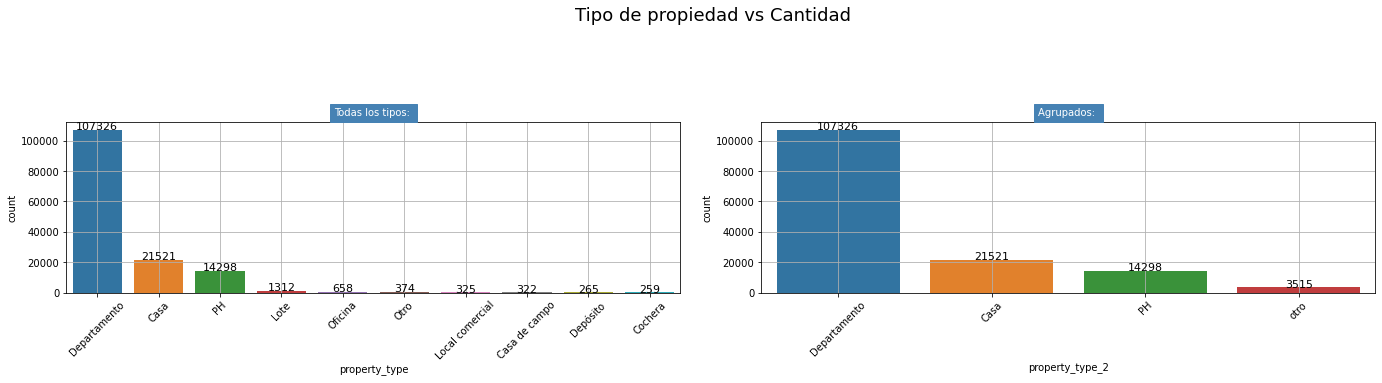

In [16]:
## creamos la figura con subplots de 1 linea 2 columnas
fig, axes = plt.subplots(1,2, figsize=(20, 5))
fig.suptitle('Tipo de propiedad vs Cantidad', fontsize=18)
#padding between subplots. Pass a float parameter to specify the amount of padding between subplots.
fig.tight_layout(pad=5.0)

# GRacount 0
sns.countplot(data = df, x = "property_type", orient='v', ax=axes[0], order = df['property_type'].value_counts().index)
axes[0].set_title("Todas los tipos: ",fontsize = 10, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
#plt.sca(axes[0, 1])
plt.sca(axes[0])
plt.xticks(rotation=45)
plt.grid()

for rect in axes[0].patches:
    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

#Grafico 1
sns.countplot(data = df, x = "property_type_2", orient='v', ax=axes[1], order = df['property_type_2'].value_counts().index)
axes[1].set_title("Agrupados: ",fontsize = 10, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
plt.sca(axes[1])
plt.xticks(rotation=45)
plt.grid()

for rect in axes[1].patches:
    axes[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Se observa que los tres tipos de propiedades con mayor número son Departamentos con un 73.2%, Casa 14.7% y PH  9.7%, el resto solo el el 2.4% de los datos. Graficamos para ver más claramente las proporciones, observar que el gráfico está ordenado de mayor a menor y hay que leerlo desde las 6 en punto en sentido horario.

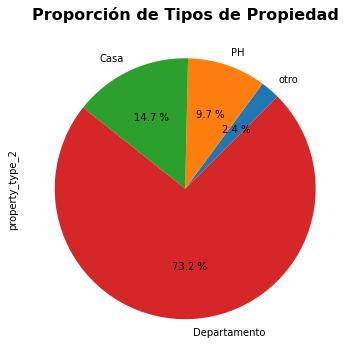

In [17]:
ax = df.property_type_2.value_counts().sort_values().plot.pie(startangle=45, autopct='%.1f %%', figsize=(8, 6))
ax.set_title("Proporción de Tipos de Propiedad",fontsize=16, weight="bold")
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

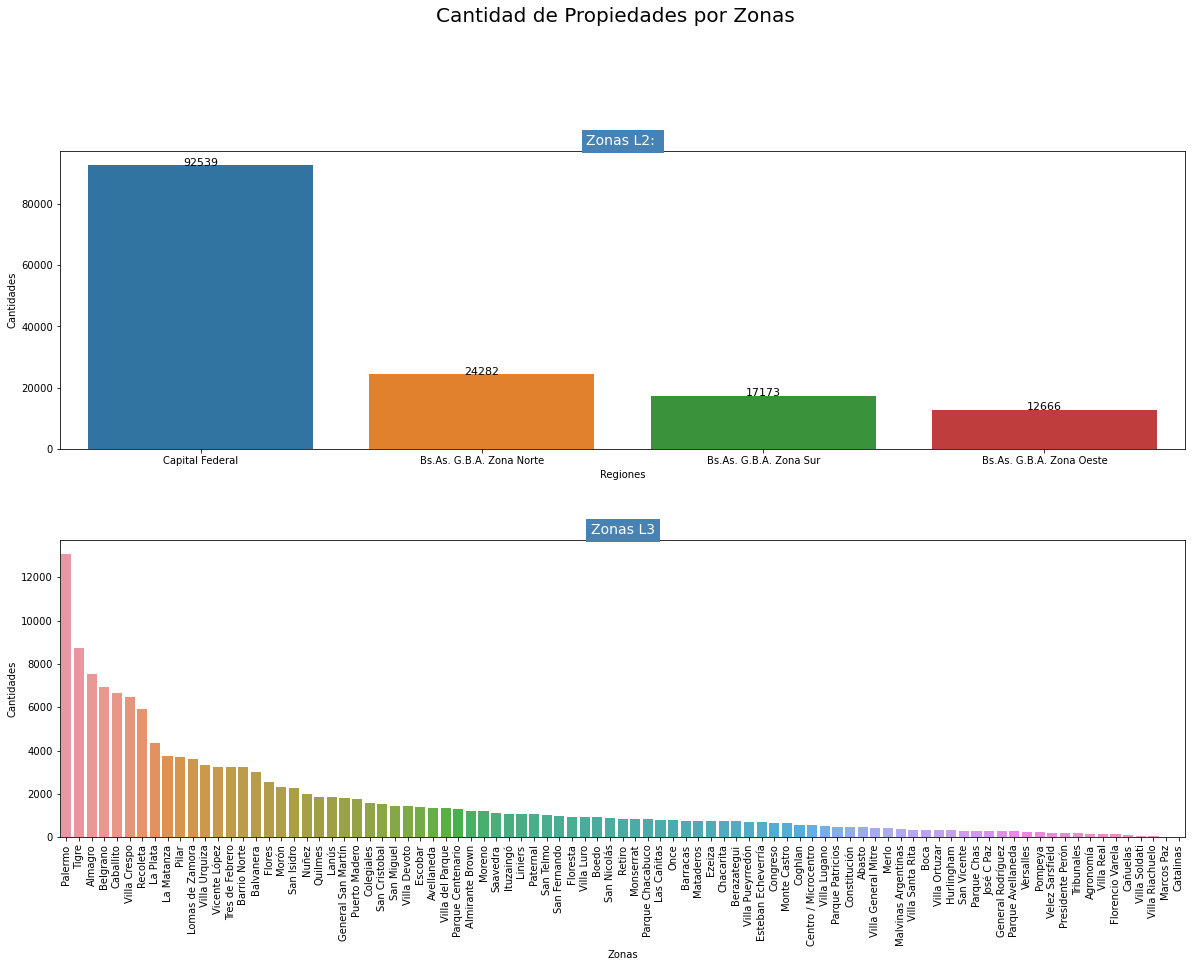

In [18]:
# Creamos la figura y los ejes
fig, axes = plt.subplots(2, figsize=(18, 13))
fig.suptitle('Cantidad de Propiedades por Zonas', fontsize=20)
fig.tight_layout(pad=7.0)

# GRafico 0
ax = sns.countplot(ax=axes[0], data = df , x = "l2", order = df['l2'].value_counts().index)
axes[0].set_title("Zonas L2: ",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
axes[0].set_xlabel("Regiones")
axes[0].set_ylabel("Cantidades")

for rect in axes[0].patches:
    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

# Gráfico 1
ax = sns.countplot(ax=axes[1], data = df , x = "l3", order = df['l3'].value_counts().index)
axes[1].set_title("Zonas L3",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
plt.xticks(rotation=90)
axes[1].set_xlabel("Zonas")
axes[1].set_ylabel("Cantidades")
plt.show()

En los gráficos anteriores se observa la cantidad propiedades por zonas L2 (regiones), ordenadas de mayor a menor, teniendo a Capital Federal concentrando el mayor número de propiedades. Este es seguido por el gráfico de las cantidades de propiedades por zonas L3.

#### Top 10 de las zonas con más propiedades

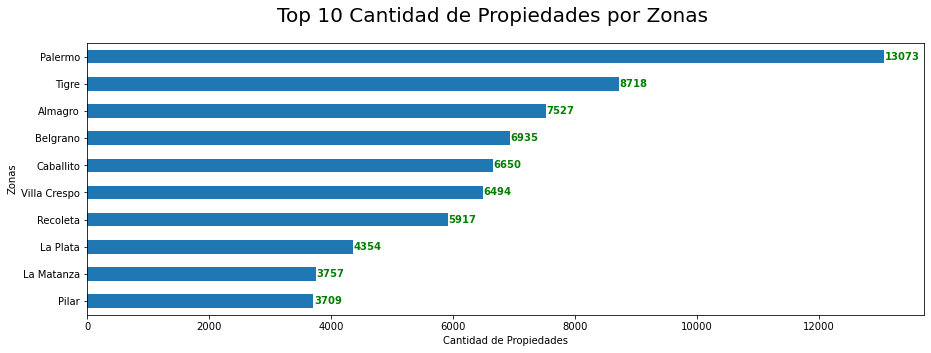

In [19]:
## Top ten de las zonas con más propiedades
y = df['l3'].value_counts(ascending=True,normalize=False).tail(10)

fig, axes = plt.subplots(figsize=(15,5))
fig.suptitle('Top 10 Cantidad de Propiedades por Zonas', fontsize=20)
axes = df['l3'].value_counts(ascending=True,normalize=False).tail(10).plot.barh()
for i, v in enumerate(y):
    #print(i)
    #axes.text(v + 3, i + .25, str(v), color='green', fontweight='bold')
    axes.text(v + 10 ,i - 0.1 ,  str(v), color='green', fontweight='bold')

plt.xlabel("Cantidad de Propiedades")
plt.ylabel("Zonas")
plt.show()

Las zonas con mayor número de propiedades son Palermo (13073), seguida por Tigre (8718) y Almagro (7527). Observando que las 7 primeras concentran el número de propiedades.

#### Cantidad de propiedades por zonas y tipos, top 10
Analizamos los tipos de propiedades por zonas, para ello se crea un nuevo dataframe que contiene el top 10 de las zonas con mayor número de propieades (count) así luego hacer un merge con el dataframe de Capital Federal(df_CAP) y solo dejar las zonas comprendidas en el Top 10.

Notar que hay una diferencia sobre las zonas que entraron en el top10 y las cantidades porque se filtran los datos por región "Capital Federal" y por tipo de propiedad (Departamento, PH y Casa)

Cantidad de propiedades por zonas, top 10                 l3  Total
26        Palermo  13007
2         Almagro   7498
6        Belgrano   6876
9       Caballito   6610
44   Villa Crespo   6429
35       Recoleta   5869
55  Villa Urquiza   3325
5    Barrio Norte   3198
3       Balvanera   2941
17         Flores   2535


Text(0, 0.5, 'Zonas')

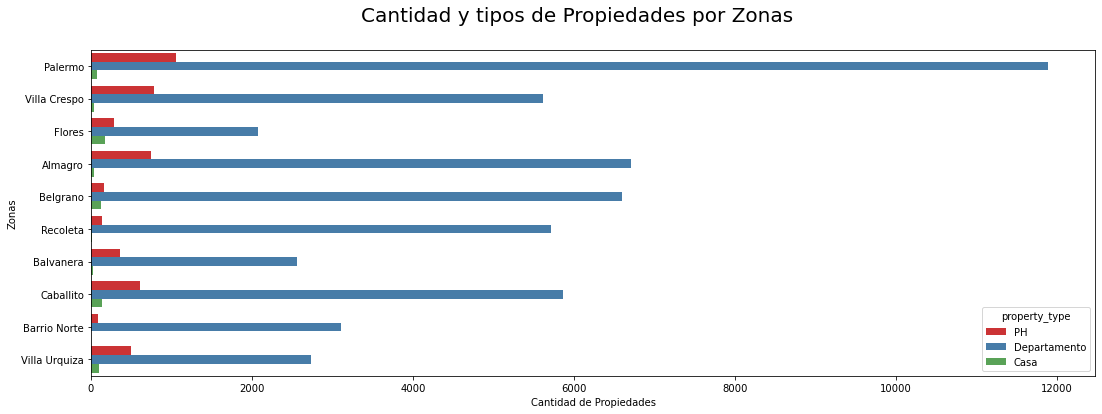

In [18]:
#Filtramos las 10 localidades con mayor número de propiedades para analizar por tipos de propiedades
df_CAP = df[(df.l2 == "Capital Federal")]
df_CAP = df_CAP[(df_CAP.property_type == "Departamento") | (df_CAP.property_type == "Casa") | (df_CAP.property_type == "PH") ]

# realizamos agrupamos por l3, y realizamos el conteo. El resultado lo cuardamos en un nuevo dataframe "count" y ordenamos por l1 que contiene el valor del conteo y nos quedamos con el top 10
count = df_CAP.groupby(['l3'], as_index=False)['l1'].count().sort_values(['l1'], ascending=False).head(10)
# renombramos el valor de la columna de l1 por Total
count = count.rename(columns = {'l1': 'Total'}, inplace = False)
print("Cantidad de propiedades por zonas, top 10 ",count,end='\n')
# Hago un merge con la data original para quedarme sólo con los barrios que están en el top. how="right", me quedo con las coincidencias del dataframe 2 anteriormente creado que machee la columna l3
df_CAP_top = pd.merge(df_CAP,count, how='right', on=['l3'])
#print(df_CAP_top.l3.unique())

#df_CAP_top.shape
#, order = df_CAP_top['l3'].value_counts().index
fig, axes = plt.subplots(figsize=(18, 6))
fig.suptitle('Cantidad y tipos de Propiedades por Zonas', fontsize=20)
ax = sns.countplot(y='l3', hue="property_type", data=df_CAP_top, palette="Set1")
plt.xlabel("Cantidad de Propiedades")
plt.ylabel("Zonas")

En este gráfico se visualiza el top 10 de zonas con mayor número de propiedades discriminando en el mismo por tipo. Se observa que tipo de propiedad dominante es "Departamento", para todas las zonas, y en menor proporción seguido por los PH

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [19]:
## Creo un nuevo dataframe a partir de las 3 clases más abundantes (Departamento,Cada y PH)
df2 = df[(df.property_type == "Departamento") | (df.property_type == "Casa") | (df.property_type == "PH") ]
## Creo otro Dataframe usando ya el filtrado anterior con la de la zona con mayor propiedades
df3 = df2[(df2.l2 == "Capital Federal")]
## imprimo el tamaño
print("Tamaño dataset ",df3.shape)

#Cantidad por clase en zona l2 Capital Federal
#print(df3['property_type'].value_counts())

Tamaño dataset  (91485, 20)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

#### A) Datos Estadísticos para ver que valores abarcan las variables

In [20]:
df3[['rooms','bedrooms','bathrooms','surface_total','surface_covered']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000
mean,2.964278,1.960278,1.560147,112.626369,94.966310
std,1.314704,1.072946,0.860309,980.713664,778.515243
min,1.000000,0.000000,1.000000,10.000000,1.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000
50%,3.000000,2.000000,1.000000,71.000000,63.000000
75%,4.000000,3.000000,2.000000,111.000000,96.000000
max,26.000000,15.000000,14.000000,126062.000000,126062.000000


Los valores que no tienen mucho sentido son: 
- superficie todal menor a la cubierta
- rooms < a bedrooms + bathrooms

#### B) Superficie Total surface_total, analisis de distribución y filtrado de outliers

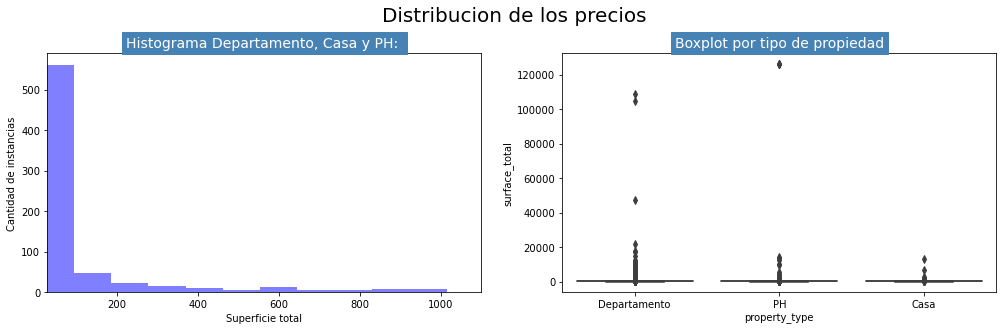

In [21]:
# Creamos la figura y los ejes
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Distribucion de los precios', fontsize=20)
fig.tight_layout(pad=5.0)

# GRafico 0
muestra1 = df3['surface_total'].value_counts()
axes[0].hist(muestra1, bins = 20, alpha = 0.5, label = 'surface_total', color='blue')
axes[0].set_title("Histograma Departamento, Casa y PH: ",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
axes[0].set_xlim([28,1100]) ## limite en x, para acotar y quitar los outliers
axes[0].set_xlabel("Superficie total")
axes[0].set_ylabel("Cantidad de instancias")

#for rect in axes[0].patches:
#    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

# Gráfico 1
ax = sns.boxplot(ax=axes[1], data = df3, x = 'property_type', y = "surface_total")
axes[1].set_title("Boxplot por tipo de propiedad",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
plt.xticks(rotation=0)
plt.show()

Realizamos un histograma para ver la cantidad de instancias por superficie total, y un boxplot, discriminando por tipo de propiedad para detectar los outliers o valores extremos por cada tipo. Se observa que en PH y Departamento tienen outliers que podrían ser eliminados porque están fuera de un rango lógico de superficie para esos tipos de propiedad.

#### Los valores atípicos (outilers) son aquellos puntos que están mas allá del límite inferior o superior. Para determinar los mismos, creamos una funcion llamada *''remove_outlier''* que filtra por los límites.

In [22]:
df3.surface_total.describe()

count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
25%          49.000000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64

#### Función `remove_outlier`

In [23]:
## Funcion para obtener filtrar los outliers, pasando el dataframe y la columna
def remove_outlier(df_in, col_name,tipo):
    '''
    Dado un dataframe (df_in) devuelve el mismo pero
    filtrado por los límites superiores e inferiores
    según el críterio de los rangos intercuartilicos * 1.5.
    
    Arguments:
    df_in -- dataframe a filtrar
    col_name -- columna por la cual se va a filtrar los datos, valores discretos
    tipo -- tipo de propiedad para filtrar el dataset
    Returns:
    df_out -- dataframe filtrado por tipo de propiedad y límites usando los rango intercuartilicos
    '''
    #dataframe con solo un tipo de propiedad
    df_in_type = df_in[df_in.property_type==tipo]
    q1 = df_in_type[col_name].quantile(0.25)
    q3 = df_in_type[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    limit_low  = q1-1.5*iqr
    limit_high = q3+1.5*iqr
    df_out = df_in_type.loc[(df_in_type[col_name] > limit_low) & (df_in_type[col_name] < limit_high)]
    return df_out, limit_low, limit_high

#### Obtenemos los límites para cada tipo de propiedad:

In [24]:
## dataframe filtrado Departamento quitando los datos fuera de los límites de 1.5*IQR
df_out_Departamento, limit_Departamento_low, limit_Departamento_high = remove_outlier(df3,'surface_total','Departamento')
print("Límite inferior {} y límite superior {}".format(limit_Departamento_low, limit_Departamento_high))
#df_out_PH.property_type.unique()
#df_out_Departamento.describe()

Límite inferior -31.0 y límite superior 177.0


In [25]:
df_out_PH, limit_PH_low, limit_PH_high = remove_outlier(df3,'surface_total','PH')
print("Límite inferior {} y límite superior {}".format(limit_PH_low, limit_PH_high))
#df_out_PH.property_type.unique()
#df_out_PH.describe()

Límite inferior -53.0 y límite superior 275.0


In [26]:
df_out_Casa, limit_Casa_low, limit_Casa_high = remove_outlier(df3,'surface_total','Casa')
print("Límite inferior {} y límite superior {}".format(limit_Casa_low, limit_Casa_high))
#df_out_PH.property_type.unique()
#df_out_Casa.describe()

Límite inferior -85.0 y límite superior 579.0


#### Filtramos los datos según los límites obtenidos
Se observa que el límite inferior está tomando valores de superficie negativos, con lo cual podemos aplicar otro filtro tomando como superficie total mayor a 20m2 y el límite superior al obtenido anteriormente

In [27]:
df_out_Departamento = df_out_Departamento[(df_out_Departamento.surface_total > 20) & (df_out_Departamento.surface_total < limit_Departamento_high)]
df_out_PH = df_out_PH[(df_out_PH.surface_total > 20) & (df_out_PH.surface_total < limit_PH_high)]
df_out_Casa = df_out_Casa[(df_out_Casa.surface_total > 20) & (df_out_Casa.surface_total < limit_Casa_high )]

#### Concatenamos los 3 dataframes

In [28]:
concatDF = pd.concat([df_out_Departamento,df_out_PH])
concatDF2 = pd.concat([concatDF,df_out_Casa])

#### Controlamos cuantas instancias queda por cada tipo de propiedad

In [29]:
print("Tamaño anterior del dataframe",df3.shape)
print("----------------------------------------")
print("Tamaño después de filtar por superficies dataframe",concatDF.shape)
print("**********************")

#concatDF2.property_type.unique()
#concatDF.head()
print(concatDF2['property_type'].value_counts())

Tamaño anterior del dataframe (91485, 20)
----------------------------------------
Tamaño después de filtar por superficies dataframe (74135, 20)
**********************
Departamento    65146
PH               8989
Casa             2166
Name: property_type, dtype: int64


#### Graficamos para ver la distribución

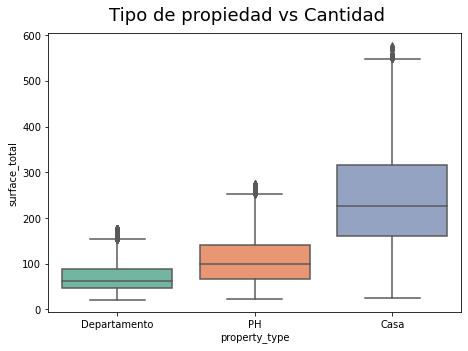

In [30]:
## creamos la figura con subplots de 1 linea 2 columnas
fig, axes = plt.subplots(1, figsize=(7, 5))
fig.suptitle('Tipo de propiedad vs Cantidad', fontsize=18)
#padding between subplots. Pass a float parameter to specify the amount of padding between subplots.
fig.tight_layout(pad=3.0)
sns.boxplot(data = concatDF2, x = 'property_type', y = "surface_total", order = concatDF2['property_type'].value_counts().index, palette="Set2")
#sns.swarmplot(x="property_type", y="surface_total", data=concatDF2, color=".25")
plt.show()

En este gráfico podemos observar mejor la distribución de los datos según el tipo de propiedad. Vemos que son bastante simétricas todas, los valores mayores y menores no se alejan mucho del valor medio.

#### C) Filtramos los minimos de la superficie total

Filtrado en el punto anterior

#### D) Filtramos los casos en que la propiedad cubierta sea menor que la total y normalizamos valores

In [31]:
df3_filtrado = concatDF2
# Filtramos los casos en que la propiedad cubierta sea menor que la total
#df3_filtrado_2 = df3_filtrado[(df3_filtrado.surface_covered <= df3_filtrado.surface_total) ]
df3_filtrado = df3_filtrado[(df3_filtrado.surface_covered <= df3_filtrado.surface_total) ]

In [32]:
### Normalizo los valores en cual la surface_covered > surface_total, haciendo que surface_total = surface_covered
df3_filtrado.loc[df3_filtrado['surface_covered'] >= df3_filtrado.surface_total, 'surface_total'] = df3_filtrado.surface_covered
#df3_filtrado.surface_total

/home/gonperez/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
df3_filtrado['surface_total'].describe()
#df3_filtrado.corr()

count    75093.000000
mean        80.917436
std         50.424775
min         21.000000
25%         48.000000
50%         68.000000
75%         99.000000
max        576.000000
Name: surface_total, dtype: float64

#### E) El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable

#### Realizamos un boxplot para observar la distribución de los precios

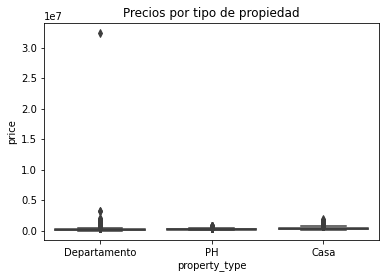

In [34]:
plt.title("Precios por tipo de propiedad")
sns.boxplot(data = df3_filtrado, x = 'property_type', y = "price")
plt.show()

Hay outliers que distorcionan el gráfico, vemos que los datos está situados en valores más pequeños.

#### Obtenemos datos estadísticos de la variable price

In [35]:
df3_filtrado.price.describe()

count    7.509300e+04
mean     2.117765e+05
std      1.866144e+05
min      7.500000e+03
25%      1.200000e+05
50%      1.700000e+05
75%      2.520000e+05
max      3.243423e+07
Name: price, dtype: float64

#### Para poder observarlos correctamente vamos a filtrar los rangos de precios que estén entre el cuartil 90 y 0.02, en este caso no se va a utilizar la función anteriormente creada para filtrar los outliers sino que directamente filtramos los datos por cuantil.

In [36]:
## filtramos los outliers por cuartiles .9 y .02 para el inferior
df4_filtrado = df3_filtrado[(df3_filtrado.price < df3_filtrado.price.quantile(.90)) & (df3_filtrado.price > df3_filtrado.price.quantile(.02))]

In [37]:
print("Tamaño antes de filtar por precios el dataframe",concatDF.shape)
print("----------------------------------------")
print("Tamaño después de filtar el dataframe",df4_filtrado.shape)

Tamaño antes de filtar por precios el dataframe (74135, 20)
----------------------------------------
Tamaño después de filtar el dataframe (65882, 20)


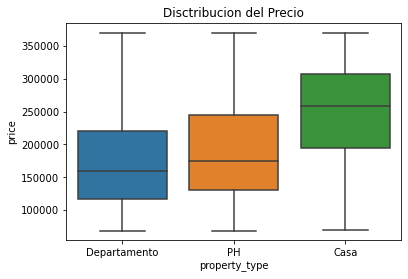

In [38]:
plt.title("Disctribucion del Precio")
sns.boxplot(data = df4_filtrado, x = 'property_type', y = "price")
plt.show()

Se observa que Departamentos y PH tienen una media de precios similares, miestras que las casas su valor es superior. Los departamentos y PH tienen asimetría positiva o segada a la derecha ya que la parte más larga de la caja es la parte superior a la mediana. Los datos se concentran en la parte inferior de la distribución. En cambio en las propiedades tipo casas, la asimetría es negativa o sesgada a la izquierda ya que la parte más larga es la inferior a la mediana. Los datos se concentran en la parte superior de la distribución.

#### Graficamos la Disctribucion del Precio

In [42]:
mediana = str(int(muestra.median()))
moda= str(int(muestra.mode()))
media = str(int(muestra.mean()) )

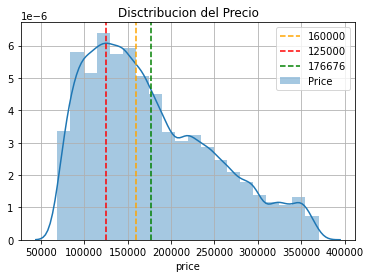

In [43]:
muestra = df4_filtrado['price']
#plt.hist(muestra, bins = 25, alpha = 0.5, label = 'Price')
sns.distplot(muestra, bins = 20, label = 'Price')
#plt.xlim([78000,550000]) ## limite en x, para acotar y quitar los outliers
#plt.ylim([79,101]) ## limite en y, para acotar en eje "y" quitar los outliers
plt.axvline(x=muestra.median(), color='orange' , linestyle='--', label=mediana )
plt.axvline(x=int(muestra.mode()), color='red' , linestyle='--', label=moda )
plt.axvline(x=muestra.mean(), color='green' , linestyle='--', label=media )

plt.title("Disctribucion del Precio")
plt.legend()
plt.grid()
plt.show()

Aquí hemos graficado la distribucuión del precio ya sin los valores extremos, se observa en el corte de color rojo la moda ubicada a los 125000, la mediana en color naranja a los 160000 y la media a 176676 en color verde. Ahora vamos a graficar por tipo de propiedad para ver si se mantiene esta distribución.

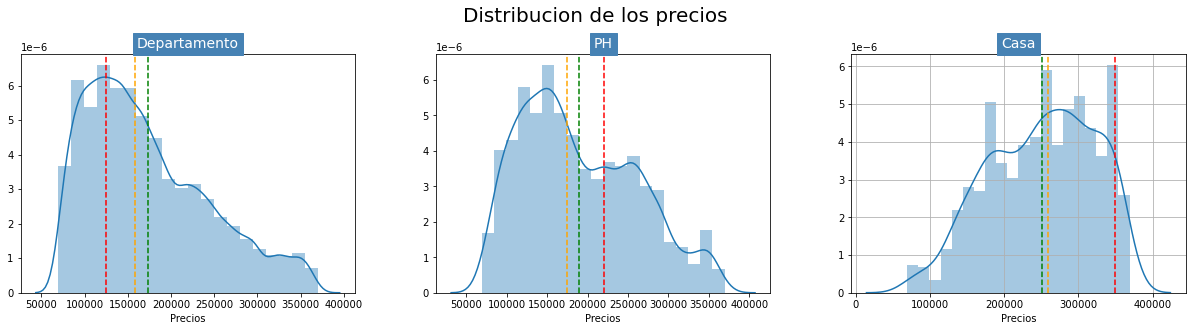

In [45]:
# Creamos la figura y los ejes
fig, axes = plt.subplots(1,3, figsize=(18, 5))
fig.suptitle('Distribucion de los precios', fontsize=20)
fig.tight_layout(pad=5.0)

# GRafico 0
muestra_dpto = df4_filtrado[(df4_filtrado.property_type == "Departamento")].price 

axes[0].set_title("Departamento",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
sns.distplot(muestra_dpto, bins = 20, label = 'Price', ax=axes[0])
#axes[0].set_xlim([28,1100]) ## limite en x, para acotar y quitar los outliers
axes[0].set_xlabel("Precios")
#axes[0].set_ylabel("Precios")
axes[0].axvline(x=muestra_dpto.median(), color='orange' , linestyle='--', label="mediana_dpto")
axes[0].axvline(x=int(muestra_dpto.mode()), color='red' , linestyle='--' , label="moda_dpto")
axes[0].axvline(x=muestra_dpto.mean(), color='green' , linestyle='--' , label="media_dpto")

# GRafico 1
muestra_ph = df4_filtrado[(df4_filtrado.property_type == "PH")].price # 
axes[1].set_title("PH",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
sns.distplot(muestra_ph, bins = 20, label = 'Price', ax=axes[1])
#axes[1].set_xlim([28,1100]) ## limite en x, para acotar y quitar los outliers
axes[1].set_xlabel("Precios")
#axes[1].set_ylabel("Precios")
axes[1].axvline(x=muestra_ph.median(), color='orange' , linestyle='--')
axes[1].axvline(x=int(muestra_ph.mode()), color='red' , linestyle='--')
axes[1].axvline(x=muestra_ph.mean(), color='green' , linestyle='--')

# GRafico 2
muestra_casa = df4_filtrado[(df4_filtrado.property_type == "Casa")].price # 
axes[2].set_title("Casa",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
sns.distplot(muestra_casa, bins = 20, label = 'Price', ax=axes[2])
#axes[2].set_xlim([28,1100]) ## limite en x, para acotar y quitar los outliers
axes[2].set_xlabel("Precios")
#axes[2].set_ylabel("Precios")
axes[2].axvline(x=muestra_casa.median(), color='orange' , linestyle='--')
axes[2].axvline(x=int(muestra_casa.mode()), color='red' , linestyle='--')
axes[2].axvline(x=muestra_casa.mean(), color='green' , linestyle='--')

plt.grid()
plt.show()

#muestra_casa.describe()

In [46]:
mediana_dpto = str(int(muestra_dpto.median()))
moda_dpto= str(int(muestra_dpto.mode()))
media_dpto = str(int(muestra_dpto.mean()) )

mediana_ph = str(int(muestra_ph.median()))
moda_ph= str(int(muestra_ph.mode()))
media_ph = str(int(muestra_ph.mean()) )

mediana_casa = str(int(muestra_casa.median()))
moda_casa= str(int(muestra_casa.mode()))
media_casa = str(int(muestra_casa.mean()) )

In [47]:
print("mediana_dpto: {} mediana_ph: {}: mediana_casa: {}".format(mediana_dpto,mediana_ph,mediana_casa))
print("media_dpto: {} media_ph: {}: media_casa: {}".format(media_dpto,media_ph,media_casa))

mediana_dpto: 158900 mediana_ph: 175000: mediana_casa: 259000
media_dpto: 173285 media_ph: 189601: media_casa: 250367


Se observa nuevamente que los Departamentos y PH tienen una media en 173285 y 189601 respectivamente, mientras que Casas en 250367. Es decir que las propiedades tipo casa, los valores de propiedades son más elevados.

##### F) Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

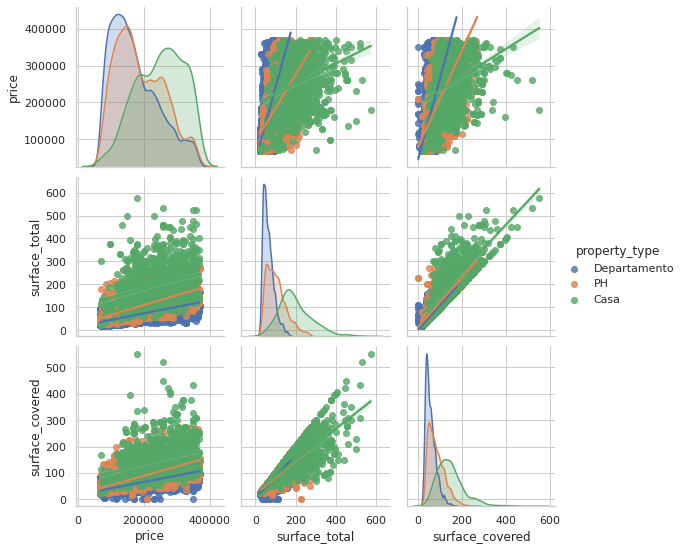

In [49]:
sns.set(style="whitegrid", font_scale=1.0)
#sns.set()
sns.pairplot(df4_filtrado, vars=["price","surface_total","surface_covered"],hue = 'property_type',kind = "reg")
#sns.pairplot(df4_filtrado, vars=["rooms", "bedrooms","bathrooms","surface_total","surface_covered","price"],hue = 'property_type')
plt.show()

Se usa el argumento, kind = "reg", que genera rectas de regresión en todos los diagramas de dispersión de la visualización. La diagonal se observa la densidad de la misma variable. Se están dividiendo los datos según alguna variable categórica mediante el uso del parámetro hue, se genera una recta de regresión para cada grupo de datos.

Por lo tanto, podemos concluir a simple vista que:

- price: para las propiedades Departamento y PH están concentradas en valores similares más bajos con respecto a las Casas.
- price vs Surface_total: todas alcanzan valores altos de precio pero las Casas están distribuidas en un mayor rango en cuanto a la superficie.
- price vs surface_covered: idem anterior 
- surface_total: Departamentos hay mayor densidad en los de menor superficie, PH se extiende un poco más en superficie y Casas presenta una distribución más normal con un rango más amplio de superficies.
- surface_covered: sigue la lógica anterior ya que surface_total y surface_covered están correlacionadas


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [226]:
df4_filtrado_corr = df4_filtrado[["rooms", "bedrooms","bathrooms","surface_total","surface_covered","price"]]
#df4_filtrado_corr.head()
df4_filtrado_corr.shape

(65882, 6)

#### Analizamos las correlaciones para todo el conjunto de datos sin discriminar por tipo de propiedades

In [227]:
df4_filtrado_corr.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931679,0.479937,0.718023,0.785462,0.562605
bedrooms,0.931679,1.000000,0.483579,0.699692,0.773351,0.547497
bathrooms,0.479937,0.483579,1.000000,0.497377,0.549764,0.539282
surface_total,0.718023,0.699692,0.497377,1.000000,0.908112,0.634842
surface_covered,0.785462,0.773351,0.549764,0.908112,1.000000,0.669331
price,0.562605,0.547497,0.539282,0.634842,0.669331,1.000000


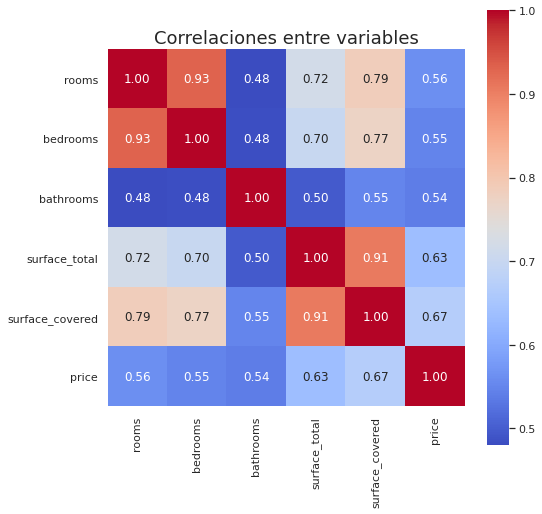

In [228]:
plt.figure(figsize=(8,8))
fig.tight_layout(pad=5.0)
plt.title("Correlaciones entre variables", fontsize=18)
sns.heatmap(df4_filtrado_corr.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',cmap= 'coolwarm')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

Las mejores variables para predecir el precio son surface_total, surface_covered y bedrooms, bathrooms no aporta mucho, es decir que incluso tiene poca correlación con otras variables.

#### Diferencias de la correlación entre tipos de propiedad, analizamos las correlaciones que hay entre las variables pero por tipo de propiedad

In [229]:
### PH
df4_filtrado_ph = df4_filtrado[(df4_filtrado['property_type'] == 'PH')]
#df4_filtrado_ph.head(2)
df4_filtrado_corr_ph = df4_filtrado_ph[["rooms", "bedrooms","bathrooms","surface_total","surface_covered","price"]]
print("------------------------------Correlación PH------------------------------")
df4_filtrado_corr_ph.corr()
#df4_filtrado['property_type'].unique()

------------------------------Correlación PH------------------------------


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.932521,0.466847,0.651404,0.742068,0.570061
bedrooms,0.932521,1.000000,0.447160,0.617698,0.725456,0.559451
bathrooms,0.466847,0.447160,1.000000,0.442724,0.522260,0.475015
surface_total,0.651404,0.617698,0.442724,1.000000,0.823808,0.622844
surface_covered,0.742068,0.725456,0.522260,0.823808,1.000000,0.683569
price,0.570061,0.559451,0.475015,0.622844,0.683569,1.000000


In [230]:
### Departamento
df4_filtrado_dpto = df4_filtrado[(df4_filtrado['property_type'] == 'Departamento')]
#df4_filtrado_ph.head(2)
df4_filtrado_corr_dpto = df4_filtrado_dpto[["rooms", "bedrooms","bathrooms","surface_total","surface_covered","price"]]
print("----------------------------Correlación Departamento ---------------------")
df4_filtrado_corr_dpto.corr()
#df4_filtrado['property_type'].unique()

----------------------------Correlación Departamento ---------------------


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.923797,0.467446,0.740798,0.793828,0.561687
bedrooms,0.923797,1.000000,0.475615,0.731504,0.787363,0.544365
bathrooms,0.467446,0.475615,1.000000,0.560461,0.577464,0.546332
surface_total,0.740798,0.731504,0.560461,1.000000,0.927419,0.746716
surface_covered,0.793828,0.787363,0.577464,0.927419,1.000000,0.731195
price,0.561687,0.544365,0.546332,0.746716,0.731195,1.000000


In [231]:
### Casa
df4_filtrado_casa = df4_filtrado[(df4_filtrado['property_type'] == 'Casa')]
#df4_filtrado_ph.head(2)
df4_filtrado_corr_casa = df4_filtrado_dpto[["rooms", "bedrooms","bathrooms","surface_total","surface_covered","price"]]
print("----------------------------Correlación Casa ---------------------------")
df4_filtrado_corr_casa.corr()

----------------------------Correlación Casa ---------------------------


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.923797,0.467446,0.740798,0.793828,0.561687
bedrooms,0.923797,1.000000,0.475615,0.731504,0.787363,0.544365
bathrooms,0.467446,0.475615,1.000000,0.560461,0.577464,0.546332
surface_total,0.740798,0.731504,0.560461,1.000000,0.927419,0.746716
surface_covered,0.793828,0.787363,0.577464,0.927419,1.000000,0.731195
price,0.561687,0.544365,0.546332,0.746716,0.731195,1.000000


Se observa mayor correlación para los tipos de propiedad Casa y Departamente de las variables surface_total y surface_covered con price

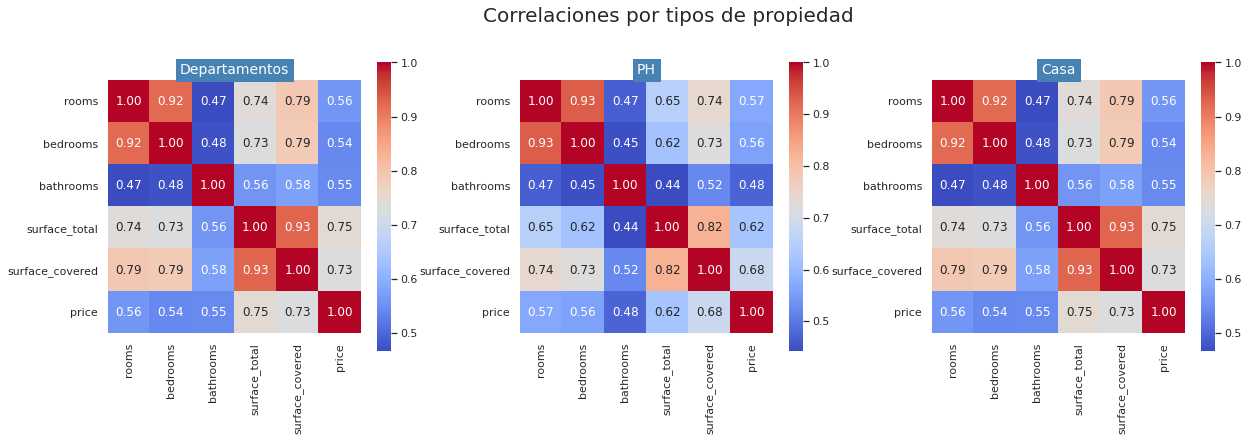

In [232]:
# Creamos la figura y los ejes
fig, axes = plt.subplots(1,3, figsize=(18, 6))
fig.suptitle('Correlaciones por tipos de propiedad', fontsize=20)
fig.tight_layout(pad=5.0)

## Primer gráfico
axes[0].set_title("Departamentos",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
sns.heatmap(df4_filtrado_corr_dpto.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',cmap= 'coolwarm', ax=axes[0])

## Segundo gráfico
axes[1].set_title("PH",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
sns.heatmap(df4_filtrado_corr_ph.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',cmap= 'coolwarm', ax=axes[1])

## tercer gráfico
axes[2].set_title("Casa",fontsize = 14, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
sns.heatmap(df4_filtrado_corr_casa.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',cmap= 'coolwarm', ax=axes[2])

plt.show()

Se mantienen las correlaciones por tipo de propiedades con respecto a las calculadas anteriormente sin realizar la discriminación.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

In [233]:
df4_filtrado.columns
#properati_filtered.head(1)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type', 'property_type_2'],
      dtype='object')

#### Para analizar cual es el barrio más caro de Buenos Aires agrego Columna de precio x m2, asi poder comparar barrios de los que tengan el m2 más elevado.

In [235]:
#Dos formas de agregar una nueva columna:
#1) # add new column using square bracket notation
#df4_filtrado['price_m2'] = df4_filtrado['price'] / df4_filtrado['surface_total']
#df4_filtrado['price_m2'] = df4_filtrado.price / df4_filtrado.surface_total

#2) add a new column to a dataframe is to use “loc” function. Here we specify the new column variable and its values
df4_filtrado.loc[:,'price_m2'] = df4_filtrado.price / df4_filtrado.surface_total

#df4_filtrado.price
#df4_filtrado.surface_total

#df4_filtrado.price_m2.head(3)

### Análisis por zona

Hacemos un analisis por zona, primero agrupando por zona (l3), obteniendo el promedio del precio x m2, luego ardenamos los valores de mayor a menor y nos quedamos con los 10 primeros y luego volvemos a ordenar para mostrar el valor más grande primero en la gráfica. 

Notar que se pasan los números a enteros para eliminar los decimales y poder visualizar mejor.

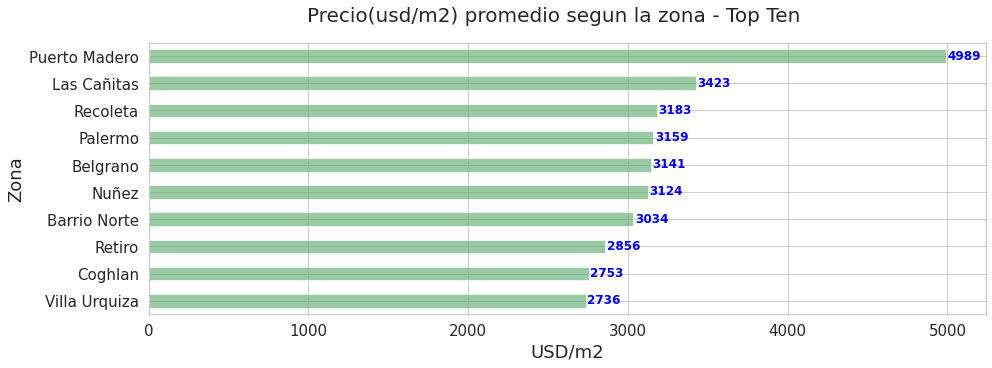

In [236]:
## Top ten de las zonas con más propiedades
#Convertir una serie en int con astype(int)
y = df4_filtrado.groupby('l3').mean()['price_m2'].sort_values(ascending=False)[0:10].astype(int).sort_values()

fig, axes = plt.subplots(figsize=(15,5))
fig.suptitle('Precio(usd/m2) promedio segun la zona - Top Ten', fontsize=20)
axes = df4_filtrado.groupby('l3').mean()['price_m2'].sort_values(ascending=False)[0:10].sort_values().plot.barh(color='g',fontsize=15, alpha=0.6)

axes.set_ylabel("Zona", fontsize=18)
axes.set_xlabel("USD/m2", fontsize=18)
for i, v in enumerate(y):
    #print(i)
    #axes.text(v + 3, i + .25, str(v), color='green', fontweight='bold')
    axes.text(v + 10 ,i - 0.1 ,  str(v), color='blue', fontweight='bold')
plt.show()

El Barrio más caro es Puerto Madero, tiene el metro cuadrado más elevado ($4936).

In [237]:
#df4_filtrado.groupby('l3').mean().head(10)
#Barrio más caro por m2 top 10
df4_filtrado.groupby('l3').mean()['price_m2'].sort_values(ascending=False)[0:10].astype(int)

l3
Puerto Madero    4989
Las Cañitas      3423
Recoleta         3183
Palermo          3159
Belgrano         3141
Nuñez            3124
Barrio Norte     3034
Retiro           2856
Coghlan          2753
Villa Urquiza    2736
Name: price_m2, dtype: int64

In [238]:
#sns.set(style="whitegrid", font_scale=1.0)
#sns.set()
#sns.pairplot(df4_filtrado, vars=["surface_total","surface_covered","price"],hue = 'property_type')

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [239]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [1]:
#1. Cargamos el csv y creamos el dataframe (df)
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

## Creo un nuevo dataframe con propiedades de Capital Federay y tipo de propiedad Departamento,Cada y PH
df2 = df[(df.property_type == "Departamento") | (df.property_type == "Casa") | (df.property_type == "PH") ]
## Creo otro Dataframe usando ya el filtrado anterior con la de la zona con mayor propiedades
df3 = df2[(df2.l2 == "Capital Federal")]
## imprimo el tamaño
print("Tamaño dataset ",df3.shape)

NameError: name 'pd' is not defined

In [241]:
#2. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
df3_filtrado = df3[(df3.surface_total <= 1000) & (df3.surface_total >= 15)]
df3_filtrado.shape

(82405, 19)

In [242]:
#3. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares
df4_filtrado = df3_filtrado[(df3_filtrado.price <= 4000000)]

In [243]:
#4. Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price
df5 = df4_filtrado[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
df5.head()
df5.shape

(82373, 6)

In [244]:
#5. Descarta aquellas instacias con valores faltantes.
df5 = df5.dropna()
df5.shape

(81019, 6)

**Métrica** 

Como la variable a predecir es el precio de una propiedad, es decir un valor continuo, se elige la métrica RMSE para poder evaluar el módelo de regresión líneal.Aunque es sensible a valores atípicos, no deberíamos tener problemas porque los hemos eliminados de nuestro dataset. No usamos MSE, porque el error no queda en mágnitudes ni unidades de la variable (precio). Como estamos hablando de error, esperamos obtener un valor bajo de RMSE, lo más cercano a 0 posible. 

##### Seleccionar las variables predictoras (X) y la variable a predecir (y).

In [245]:
# Elegimos la data para predecir y el target y
#X = df5[['surface_total', 'rooms']]
X = df5[['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
y = df5.price

Realizar un Train/Test split de los datos.

In [8]:
## Spliteamos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(len(X),len(X_train),len(X_test))

81019 56713 24306


### Generamos un modelo *benchmark* o *baseline*

Se eligió el modelo de regresión líneal

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#creamos el objetos 
linear_model = LinearRegression()

#entrenamos el modelo
linear_model.fit(X_train, y_train)

#La regresión lineal obtiene la pendiente y la ordenada al origen.
print(linear_model.coef_, linear_model.intercept_)

[ 1.16192981e+04 -6.29435576e+04  1.32759235e+05  2.05427168e+03
  1.07004571e+02] -56646.24807940825


In [11]:
# predecimos sobre los datos de test y train
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


#### Probamos predecir pasando propiedades puntuales tomadas del dataset

In [21]:
instancia = np.array([2,1,1,59,43]) # tomamos la instancia 70681
instancia = instancia.reshape(1,-1) 
y_pred = linear_model.predict(instancia)
print("El valor de la predicción es: {} y el valor real {}".format(list(y_pred),y_train[70681]))

El valor de la predicción es: [162211.2506211107] y el valor real 145000.0


In [14]:
X_train.head(10)

,rooms,bedrooms,bathrooms,surface_total,surface_covered
12452,3.0,2.0,1.0,72.0,72.0
41273,2.0,1.0,1.0,55.0,50.0
62245,3.0,2.0,2.0,79.0,66.0
64848,3.0,2.0,1.0,108.0,80.0
70681,2.0,1.0,1.0,59.0,43.0
1552,4.0,3.0,1.0,75.0,70.0
137144,2.0,1.0,1.0,51.0,47.0
141958,4.0,3.0,2.0,200.0,200.0
68802,4.0,3.0,2.0,150.0,125.0
5531,4.0,3.0,2.0,85.0,76.0


In [17]:
y_train.head(10)


12452     270000.0
41273     230000.0
62245     215000.0
64848     290000.0
70681     145000.0
1552      259000.0
137144    148451.0
141958    650000.0
68802     200000.0
5531      255000.0
Name: price, dtype: float64

### Grafico de la distribución del error (izquierda) y el RMSE (derecha)

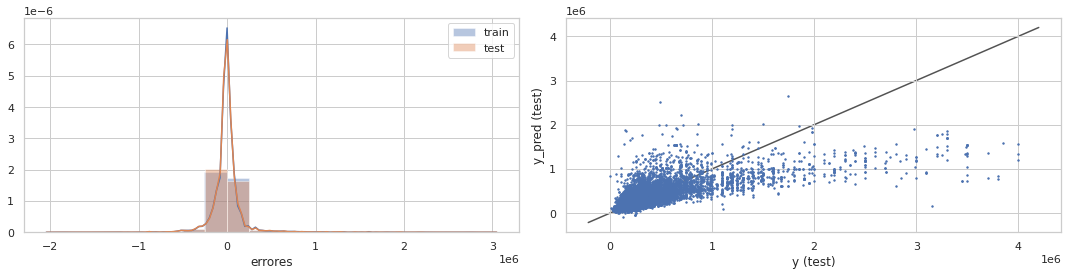

In [316]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste para valores pequeños de y.  Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos y concentrados cerca de 0.

El error cuadratico medio es muy alto para grandes valores de precios, pero aproxima bien en propiedades de menor valor y es muy errático para propidades que superan los 150 mil dólares.

### Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Profundidad árbol de decisiones
max_depth=3
#Cantidad de vecinos
n_neighbors=5

#creamos los objetos 
tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

In [24]:
#entrenamos cada uno de los modelos
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
## Predicción: modelo Arbol
y_train_arbol_pred = tree_regressor.predict(X_train)
y_test_arbol_pred = tree_regressor.predict(X_test)
## Predicción: modelo Vecinos más cercanos
y_train_vecino_pred = knn_regressor.predict(X_train)
y_test_vecino_pred = knn_regressor.predict(X_test)

In [26]:
rango_train = range(1,y_train_arbol_pred.size+1)
rango_test = range(1,y_test_arbol_pred.size+1)

### Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327


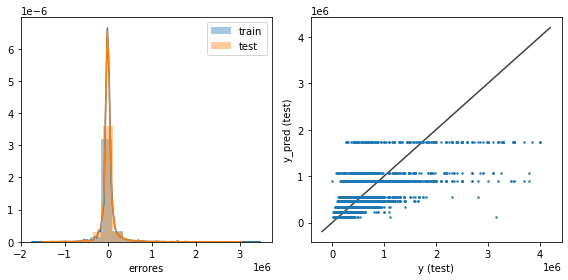

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


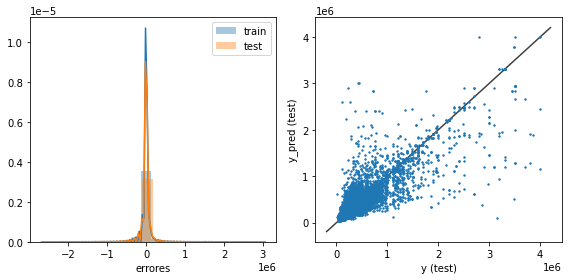

In [27]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #print(i)
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Los errores RMSE representan el error global del regresor. Son similares tanto para test como para train, indicando que no hay un gran sobreajuste. Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos.

Se observa que el módelo que se obtiene un mejor RMSE es el Vecinos más cercanos, utilizando como features rooms,bedrooms,bathrooms,surface_total y surface_covered para predecir el precio, pero hay overfitting para valores que superan los 100mil dolares. 

#### Graficamos para comparar ambos modelos, sobre los datos reales sobre los predichos

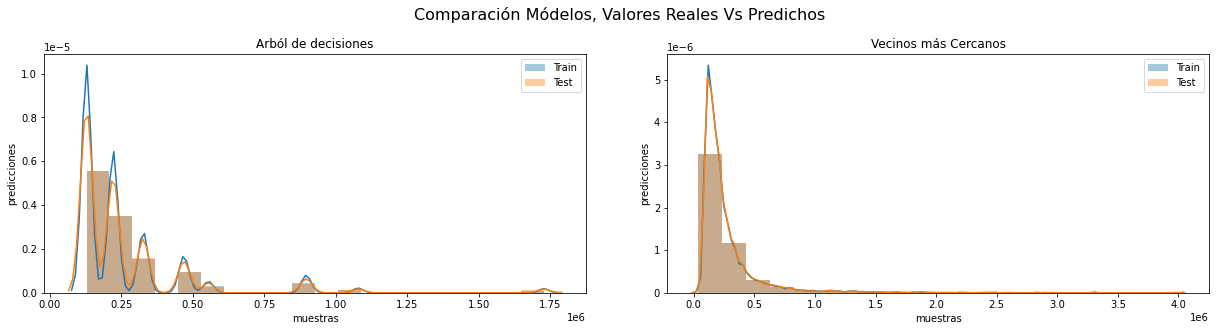

In [28]:
x_train = rango_train
x_test = rango_test
## defino la figura y los ejes
fig, ax = plt.subplots(1,2)
## tamaño de la figura
fig.set_size_inches(18,5)
fig.tight_layout(pad=5.0)

### titulo de la figura
plt.suptitle('Comparación Módelos, Valores Reales Vs Predichos', fontsize=16)

sns.distplot(y_train_arbol_pred, bins = 20 , kde=True, ax=ax[0], label='Train')
sns.distplot(y_test_arbol_pred, bins = 20 , kde=True, ax=ax[0], label='Test')
ax[0].legend()
ax[0].set(title = "Arból de decisiones",
       xlabel = "muestras",
       ylabel = "predicciones")
#ax[0].set_xlim([0,24200]) ## limite en x, para acotar y quitar los outliers
#ax[0].legend()

#dos gráficas en el mismo subplots
sns.distplot(y_train_vecino_pred, bins = 20 , kde=True, ax=ax[1], label='Train')
sns.distplot(y_test_vecino_pred, bins = 20 , kde=True, ax=ax[1], label='Test')

#ax[1].set_xlim([0,24200]) ## limite en x, para acotar y quitar los outliers
ax[1].legend()
ax[1].set(title = "Vecinos más Cercanos",
       xlabel = "muestras",
       ylabel = "predicciones")
#plt.savefig('rmse_arbolvsvecinos.png', dpi = 400)
plt.show()

### Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

Aquí se intenta mejorar los modelos probando con los parámetros de números de vecinos y profundidad del árbol en un rango de 1 al 50.

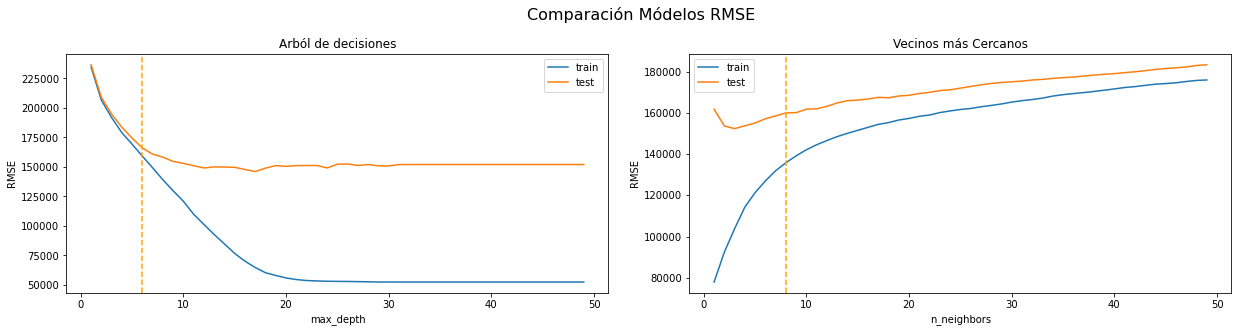

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

#Lista vacia para guardar el RMSE del modelo de arbol de decisiones
lista_rmse_arbol_train = []
lista_rmse_arbol_test = []
#Lista vacia para guardar el RMSE del modelo de vecinos más cercanos
lista_rmse_vecino_train = []
lista_rmse_vecino_test = []

rango = range(1,50)

for x in rango:
    #print("-------Vuelta x: ",x)
    #creamos los objetos 
    tree_regressor = DecisionTreeRegressor(max_depth=x, random_state=42)
    knn_regressor = KNeighborsRegressor(n_neighbors=x)
    #entrenamos cada uno de los modelos
    tree_regressor.fit(X_train, y_train)
    knn_regressor.fit(X_train, y_train)

    for i, model in enumerate([tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
   # 
         #print(i)
        #print(f'Modelo: {modelos[i]}')
        #print("lalala",model)
        if modelos[i] == "Árbol de Decisión":
            #print("Arbol",x)
            rmse_arbol_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_arbol_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            #print(f'Raíz del error cuadrático medio en Train: {rmse_arbol_train}')
            #print(f'Raíz del error cuadrático medio en Test: {rmse_arbol_test}')
            lista_rmse_arbol_train.append(rmse_arbol_train)
            lista_rmse_arbol_test.append(rmse_arbol_test)
        elif modelos[i] == "Vecinos más cercanos":
            #print("Vecino",x)
            rmse_vecino_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_vecino_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            #print(f'Raíz del error cuadrático medio en Train: {rmse_vecino_train}')
            #print(f'Raíz del error cuadrático medio en Test: {rmse_vecino_test}')
            lista_rmse_vecino_train.append(rmse_vecino_train)
            lista_rmse_vecino_test.append(rmse_vecino_test)
            
## graficamos

#fig, axes = plt.subplots(1,2, figsize=(18, 13))
#fig.suptitle('Cantidad de Propiedades por Zonas', fontsize=20)
x = rango

## defino la figura y los ejes
fig, ax = plt.subplots(1,2)
## tamaño de la figura
fig.set_size_inches(18,5)
fig.tight_layout(pad=5.0)

### titulo de la figura
plt.suptitle('Comparación Módelos RMSE', fontsize=16)
ax[0].plot(x,lista_rmse_arbol_train,label='train' )
ax[0].plot(x,lista_rmse_arbol_test,label='test')
ax[0].legend()
ax[0].set(title = "Arból de decisiones",
       xlabel = "max_depth",
       ylabel = "RMSE")
ax[0].axvline(x=6, color='orange' , linestyle='--')
#dos gráficas en el mismo subplots
ax[1].plot(x,lista_rmse_vecino_train,label='train' )
ax[1].plot(x,lista_rmse_vecino_test,label='test')
ax[1].legend()
ax[1].set(title = "Vecinos más Cercanos",
       xlabel = "n_neighbors",
       ylabel = "RMSE")
ax[1].axvline(x=8, color='orange' , linestyle='--')
plt.savefig('rmse_arbolvsvecinos.png', dpi = 400)
plt.show()

#### Tomamos como mejor hiperparametros max_depth=5 y  n_neighbors=8, son los puntos en que hay menor RMSE. En el modelo de Arbol de decisiones, antes del valor elegido el RMSE es muy alto y luego del mismo comienza a tener underfitting. En el modelo de vecinos más cercanos, antes del valor seleccionado hay underfitting y luego el RMSE comienza en una curva en alza. 

#### Graficamos usando el mejor Hiperparametro encontrado

In [41]:
#creamos los objetos
#Profundidad árbol de decisiones
max_depth=5
#Cantidad de vecinos
n_neighbors=8

tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

In [42]:
#entrenamos cada uno de los modelos
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 169200.1754118897
Raíz del error cuadrático medio en Test: 174352.7367379676


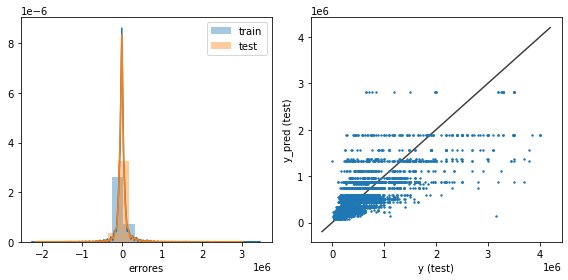

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 135799.4510120079
Raíz del error cuadrático medio en Test: 159931.45447015658


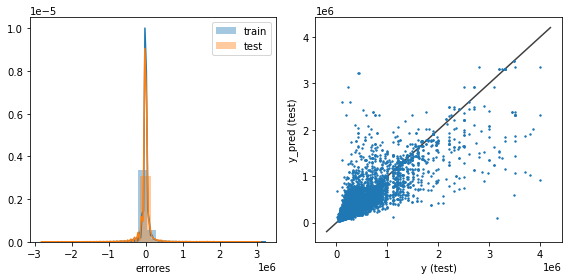

In [43]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #print(i)
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 

Entre los modelos entrenados elegiria el de vecinos más cercanos, porque sin agregarla tanta complejidad (número de vecinos) es el que mejor aproxima (que tiene menor error cuadratico medio), sobre todo para valores de precios más bajos.

#### Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

La información que no estoy empleando que podría ayudar al modelo es la úbicación, para ser más precisos l3, ya que no es lo mismo el valor de una propiedad de los mismos metros cuadrados en Flores que en Palermo. Algo similar podría evaluarse por puntos de cercanía que tiene la propiedad, por ejemplo si hay algún asentamiento cerca, shoppings, parques, accesos , servicios, etc.

La información que está de más son los metros cubiertos, ya que podemos estimar con los metros de superficie total

### Extra: Jugando con las variables para mejorar el módelo
Se intentó mejorar los modelos jugando con las variables para entrenar, filtrando por zonas y volviendo a variar los hiperparámetros conocidos hasta ahora. En ninguno de los casos se logró una mejora considerable (las pruebas realizadas se dejan comentadas).

A continuación vamos a dejar el intento de mejorar el modelo filtrando por zona, por ejemplo, las propiedades de Palermo que sean departamentos, y aumentando los datos de train para tener más información para entrenar el modelo.

In [63]:
# Probar filtrando por zona
df4_filtrado.head()
df5_filtrado = df4_filtrado[df4_filtrado.property_type == 'Departamento']
#df5_filtrado = df4_filtrado[(df4_filtrado.l3 == 'Palermo')]
#df5_filtrado.head()

In [64]:
### Normalizo los valores en cual la surface_covered > surface_total, haciendo que surface_total = surface_covered
#df5_filtrado.loc[df5_filtrado['surface_covered'] >= df5_filtrado.surface_total, 'surface_total'] = df5_filtrado.surface_covered
#df3_filtrado.surface_total

df5_filtrado = df5[(df5.surface_covered <= df5.surface_total)]
df5_filtrado = df5_filtrado

df5_filtrado.shape
#df5_filtrado.head(5)

(80276, 6)

In [65]:
df5_filtrado = df5_filtrado.dropna()
df5_filtrado.shape

(80276, 6)

In [66]:
#df5_filtrado = df3_filtrado[(df3_filtrado.price < df3_filtrado.price.quantile(.90)) & (df3_filtrado.price > df3_filtrado.price.quantile(.02))]
#df5_filtrado = df5_filtrado.dropna()

df6 = df5_filtrado[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]

#Prueba1
X = df6[['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
#Prueba2
#X = df6[['rooms','bedrooms','surface_total','surface_covered']]
#Prueba3 
#X = df6[['rooms','surface_covered']]

y = df6.price

In [67]:
X.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
dtype: int64

In [68]:
df6.shape

(80276, 6)

In [69]:
X.head(1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0


In [70]:
## Spliteamos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print(len(X),len(X_train),len(X_test))

80276 72248 8028


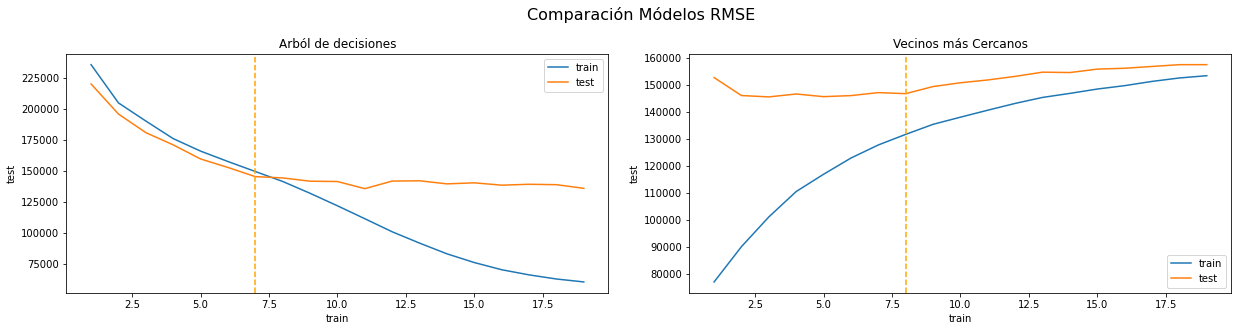

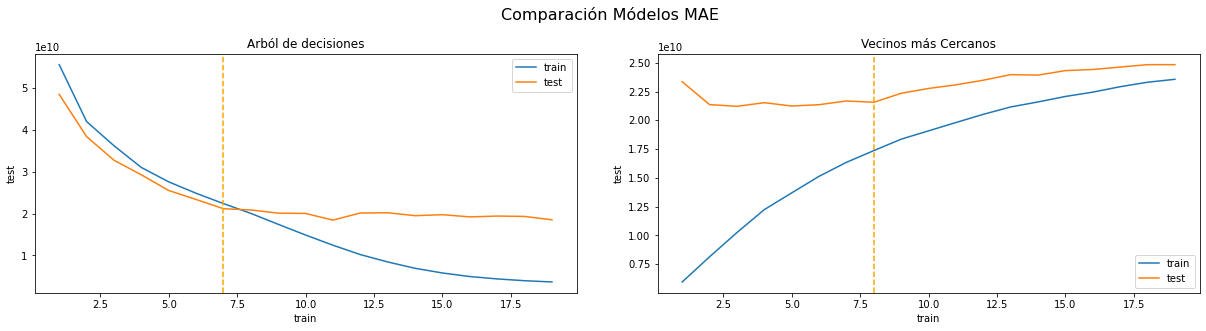

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

#Lista vacia para guardar el RMSE del modelo de arbol de decisiones
lista_rmse_arbol_train = []
lista_rmse_arbol_test = []

lista_mae_arbol_train = []
lista_mae_arbol_test = []

#Lista vacia para guardar el RMSE del modelo de vecinos más cercanos
lista_rmse_vecino_train = []
lista_rmse_vecino_test = []

lista_mae_vecino_train = []
lista_mae_vecino_test = []

rango = range(1,20)

for x in rango:
    #print("-------Vuelta x: ",x)
    #creamos los objetos 
    tree_regressor = DecisionTreeRegressor(max_depth=x, random_state=42)
    knn_regressor = KNeighborsRegressor(n_neighbors=x)
    #entrenamos cada uno de los modelos
    tree_regressor.fit(X_train, y_train)
    knn_regressor.fit(X_train, y_train)

    for i, model in enumerate([tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
   # 
         #print(i)
        #print(f'Modelo: {modelos[i]}')
        #print("lalala",model)
        if modelos[i] == "Árbol de Decisión":
            #print("Arbol",x)
            rmse_arbol_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_arbol_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            mae_arbol_train = mean_squared_error(y_train, y_train_pred)
            mae_arbol_test = mean_squared_error(y_test, y_test_pred)
            #print(f'Raíz del error cuadrático medio en Train: {rmse_arbol_train}')
            #print(f'Raíz del error cuadrático medio en Test: {rmse_arbol_test}')
            lista_rmse_arbol_train.append(rmse_arbol_train)
            lista_rmse_arbol_test.append(rmse_arbol_test)
            
            lista_mae_arbol_train.append(mae_arbol_train)
            lista_mae_arbol_test.append(mae_arbol_test)
            
            
        elif modelos[i] == "Vecinos más cercanos":
            #print("Vecino",x)
            rmse_vecino_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_vecino_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            mae_vecino_train = mean_squared_error(y_train, y_train_pred)
            mae_vecino_test = mean_squared_error(y_test, y_test_pred)
            #print(f'Raíz del error cuadrático medio en Train: {rmse_vecino_train}')
            #print(f'Raíz del error cuadrático medio en Test: {rmse_vecino_test}')
            lista_rmse_vecino_train.append(rmse_vecino_train)
            lista_rmse_vecino_test.append(rmse_vecino_test)
            lista_mae_vecino_train.append(mae_vecino_train)
            lista_mae_vecino_test.append(mae_vecino_test)
            
## graficamos

#fig, axes = plt.subplots(1,2, figsize=(18, 13))
#fig.suptitle('Cantidad de Propiedades por Zonas', fontsize=20)
x = rango

## defino la figura y los ejes
fig, ax = plt.subplots(1,2)
## tamaño de la figura
fig.set_size_inches(18,5)
fig.tight_layout(pad=5.0)

### titulo de la figura
plt.suptitle('Comparación Módelos RMSE', fontsize=16)
ax[0].plot(x,lista_rmse_arbol_train,label='train' )
ax[0].plot(x,lista_rmse_arbol_test,label='test')
ax[0].legend()
ax[0].set(title = "Arból de decisiones",
       xlabel = "train",
       ylabel = "test")
ax[0].axvline(x=7, color='orange' , linestyle='--')
#dos gráficas en el mismo subplots
ax[1].plot(x,lista_rmse_vecino_train,label='train' )
ax[1].plot(x,lista_rmse_vecino_test,label='test')
ax[1].legend()
ax[1].set(title = "Vecinos más Cercanos",
       xlabel = "train",
       ylabel = "test")
ax[1].axvline(x=8, color='orange' , linestyle='--')
plt.savefig('rmse_arbolvsvecinos.png', dpi = 400)
plt.show()



## graficamos

#fig, axes = plt.subplots(1,2, figsize=(18, 13))
#fig.suptitle('Cantidad de Propiedades por Zonas', fontsize=20)
x = rango

## defino la figura y los ejes
fig, ax = plt.subplots(1,2)
## tamaño de la figura
fig.set_size_inches(18,5)
fig.tight_layout(pad=5.0)

### titulo de la figura
plt.suptitle('Comparación Módelos MAE', fontsize=16)
ax[0].plot(x,lista_mae_arbol_train,label='train' )
ax[0].plot(x,lista_mae_arbol_test,label='test')
ax[0].legend()
ax[0].set(title = "Arból de decisiones",
       xlabel = "train",
       ylabel = "test")
ax[0].axvline(x=7, color='orange' , linestyle='--')
#dos gráficas en el mismo subplots
ax[1].plot(x,lista_mae_vecino_train,label='train' )
ax[1].plot(x,lista_mae_vecino_test,label='test')
ax[1].legend()
ax[1].set(title = "Vecinos más Cercanos",
       xlabel = "train",
       ylabel = "test")
ax[1].axvline(x=8, color='orange' , linestyle='--')
plt.savefig('rmse_arbolvsvecinos.png', dpi = 400)
plt.show()

Para el modelo de árbol de decisión, se obseva que antes de la profundidad de 7 el sistema es preciso pero tiene un RMSE alto, luego el modelo tiene underfitting.
Para el módelo de vecinos más cercanos, en valores menores de número de vecinos a 8, hay overfitting, es decir que está aproximando mucho mejor para los datos de test pero no así para con los datos de train. El punto elegído es donde se obtiene un RMSE menor.

### Volvemos a entrenar con los valores elegidos

In [85]:
#creamos los objetos
#Profundidad árbol de decisiones
max_depth=7
#Cantidad de vecinos
n_neighbors=8

tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)

In [86]:
#entrenamos cada uno de los modelos
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 149678.38591698385
Raíz del error cuadrático medio en Test: 145545.021855764


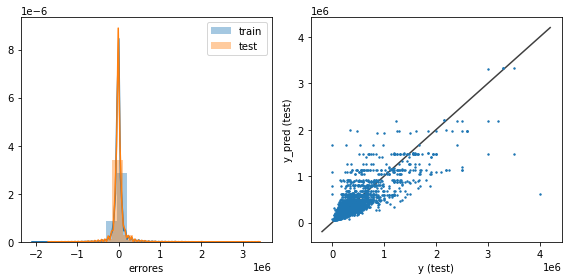

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 131771.4620974676
Raíz del error cuadrático medio en Test: 146856.79170122862


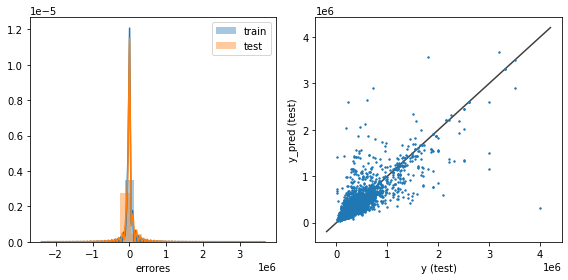

In [87]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #print(i)
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Conclusión: 
Con los datos involucrados para la mejora de los modelos y jugando los hiperparámetros no se lográ bajar sustancialmente el valor del RMSE. Podría probar involucrando datos de las descripciones de las propiedades como si tienen servicios, pileta, etc.

Con estas últimas pruebas, ahora elijo el modelo de árbol de decisión que con una profundidad de 7 como hiperparámetro tiene un error 145545 dólares.